# Recurrent Neural Network

## Data Preprocessing

### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [43]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
dataset_train.describe()

,Open,High,Low
count,1258.000000,1258.000000,1258.000000
mean,533.709833,537.880223,529.007409
std,151.904442,153.008811,150.552807
min,279.120000,281.210000,277.220000
25%,404.115000,406.765000,401.765000
50%,537.470000,540.750000,532.990000
75%,654.922500,662.587500,644.800000
max,816.680000,816.680000,805.140000


In [44]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [21]:
dataset_train.isnull().sum()
#there are no missing values
# if we have any missing values,we have to use any standard scaler to fill the missing values

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [91]:
training_set = dataset_train.iloc[:, 1:3]
print(type(training_set))
training_set = dataset_train.iloc[:, 1:3].values
print(type(training_set))
# to get a numpy array,we use iloc.values
# we are selecting the second column of datframe

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


### Feature Scaling

### minmax scaler=(x-min)/(max-min)

In [92]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# fit takes data as argument and transform method alters every row in to normalised one
# we have gib=ven a new name so as not to change the original datset
training_set_scaled

array([[0.08581368, 0.09640129],
       [0.09701243, 0.09834351],
       [0.09433366, 0.09251685],
       ...,
       [0.95725128, 0.95807422],
       [0.93796041, 0.94257381],
       [0.93688146, 0.93669113]])

### Creating a data structure with 60 timesteps and 1 output

#### we have to create a data structure so that RNN knows what need to remember

#### we need to get right number of steps as wrong number steps lead to overfitting and non-sense predictions
#### here 60 means that the RNN learns from 60 previous stock prices and understand some correlations and based on its understanding,it predicts the output

In [93]:
# for each day,x_train will contain 60 previous stock prices before the given day 
# y_train contain the output for that day
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
print(X_train.shape)

(1198, 60)


### Reshaping

In [94]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
# here reshape should have (a,b,c) where a--no of rows,,,b----no of timesteps
# we have to convert to a 3d shape
X_train.shape[1]

60

## Building and Training the RNN

### Importing the Keras libraries and packages

In [95]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
# here we built stacked LSTM(here we have 4 LSTM layers) with dropout to remove overfitting

### Initialising the RNN

In [96]:
regressor = Sequential()
# we use regression as we get a continuous output

### Adding the first LSTM layer and some Dropout regularisation

In [97]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
# units---it tells how many LSTM units are there in this Layer
# more the  value of units(ie no of neurons),more the accuracy and dimensionality
# return_sequences ----as we have Stacked LSTM layer.When we add another LSTM layer after the one you create after
#input_shape should be in 2D as no of rows are already taken by default
regressor.add(Dropout(0.2))  #0.2 is rate in shich we ignore the neurons in layers

### Adding a second LSTM layer and some Dropout regularisation

In [98]:
# from here onwards, we need not specify the input_shape
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [99]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [100]:
# this is the final LSTM layer
regressor.add(LSTM(units = 50))
# return_sequence --is not used as by default its value is False..so we wont add another LSTM layer later on
regressor.add(Dropout(0.2))

### Adding the output layer

In [101]:
# we add a fully connected layer as output has only fully connected layer
regressor.add(Dense(units = 1)) # units=1(no of neurons in output layer) as we have only need one prdicted output

### Compiling the RNN

In [102]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
# loss=binary_crossentropy needed for only classification
# here our pblm is a continous,so we use MSE

### Fitting the RNN to the Training set

In [142]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 7s 174ms/step - loss: 0.0021
Epoch 2/100
38/38 [==============================] - 6s 165ms/step - loss: 0.0023
Epoch 3/100
38/38 [==============================] - 6s 166ms/step - loss: 0.0025
Epoch 4/100
38/38 [==============================] - 6s 170ms/step - loss: 0.0022
Epoch 5/100
38/38 [==============================] - 6s 166ms/step - loss: 0.0019
Epoch 6/100
38/38 [==============================] - 6s 170ms/step - loss: 0.0020
Epoch 7/100
38/38 [==============================] - 7s 172ms/step - loss: 0.0019
Epoch 8/100
38/38 [==============================] - 7s 172ms/step - loss: 0.0020
Epoch 9/100
38/38 [==============================] - 6s 168ms/step - loss: 0.0019
Epoch 10/100
38/38 [==============================] - 6s 165ms/step - loss: 0.0019
Epoch 11/100
38/38 [==============================] - 6s 165ms/step - loss: 0.0018
Epoch 12/100
38/38 [==============================] - 6s 166ms/step - loss: 0.0018
Epoch 13/100


## Making the predictions and visualising the results

### Getting the real stock price of 2017

In [170]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:3].values
dataset_test.iloc[:,1:3].head()

,Open,High
0,778.81,789.63
1,788.36,791.34
2,786.08,794.48
3,795.26,807.90
4,806.40,809.97


### Getting the predicted stock price of 2017

In [185]:
# we need 60(timestep) size of previous rows are required to predict the the output for the latest day
dataset_total = pd.concat((dataset_train.iloc[:,1:3], dataset_test.iloc[:,1:3]), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 49:].values
inputs = inputs.reshape(-1,1)
print(inputs.shape)
inputs = sc.fit_transform(inputs)
# for above we need to reshape into a single column
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-49:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
# in above we scale the test values in b/w 0 and 1
# so in order to get original values,we use inverse_transform method

predicted_stock_price = sc.inverse_transform(predicted_stock_price)

(138, 1)


### Visualising the results

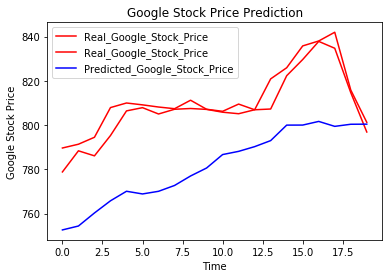

In [188]:
plt.plot(real_stock_price, color = 'red', label = 'Real_Google_Stock_Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted_Google_Stock_Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()
# stock price wont react for fast non linear changes
# here we are only concerned with the trends i.e upper or lower trends

# two red lines are "Open" And "High" columns
## predicted price

In [149]:
l=[[1,2,3],[3,4,5]]
l=np.array(l)
l.reshape(-1,1)

array([[1],
       [2],
       [3],
       [3],
       [4],
       [5]])

## EVALUATION

In [212]:
import math
from sklearn.metrics import mean_squared_error
rmse=math.sqrt(mean_squared_error(real_stock_price,predicted_stock_price))
print(rmse)
#rmse indicates how closeness to real value and predicted value

27.87753843379978


In [197]:
len(real_stock_price),len(predicted_stock_price)

(20, 20)